In [89]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [88]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [205]:
total_width = 0
total_height = 0
count = 1
folder_path = '/Users/sarthakkapila/Desktop/Untitled Folder/around-world'

for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        filepath = os.path.join(folder_path, filename)
        
        with Image.open(filepath) as img:
            width, height = img.size
            total_width += width
            total_height += height
            count += 1 
                      
average_width = total_width / count
average_height = total_height / count


average_width, average_height, count-1

(1194.2435424354244, 1688.4132841328412, 270)

In [282]:
# Transforming and converting to a tensor

transform = transforms.Compose([
    transforms.Resize((1200, 1200)),
    transforms.ToTensor(), 
])

dataset = torchvision.datasets.ImageFolder(root='/Users/sarthakkapila/Desktop/Untitled Folder/around-world', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=32, 
                                         shuffle=True)

In [294]:
# Each batch of 32 with height and width 1200 & 3 represents the RGB channels
for image in dataset:
    print(f"Images shape: {images.shape}")
    print(f"Images shape: {labels.shape}")
    
    break                                        # Gives info of a single batch 

Images shape: torch.Size([32, 3, 1200, 1200])
Images shape: torch.Size([32])


In [280]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

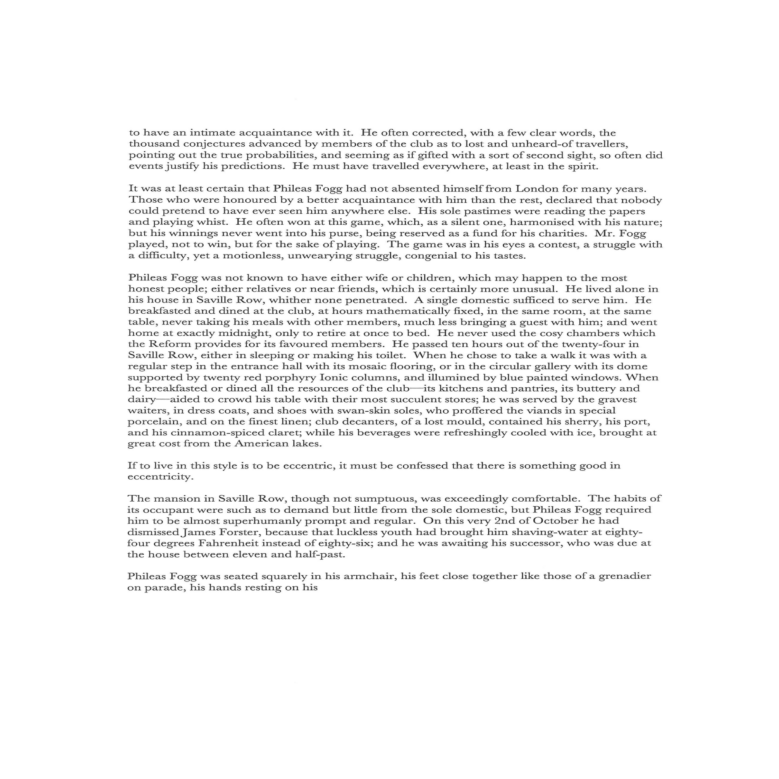

In [283]:
images, labels = next(iter(dataloader))
imshow(images[10]);

In [ ]:
# Architecture -> 8 layers 5 cnns and 3 fully connected layers 
# Acc to paper ->
# 1st CNN - 224x224x3 input image, 96 kernels of size 11x11x3
# 2nd CNN - normalized output of 1st layer with 256 kernels of 5x5x48
# 3rd CNN - 384 kernels of 3x3x256 
# 4th CNN - 383 of 3x3x192 
# 5th CNN - 256 of 3x3x192
# 6,7,8 - linear woth 4096 neurons

In [ ]:
n_full = 4096
average_width, average_height
dim = 3
kernel1 = 96
kernel1_size = (11,11,3)
kernel2 = 256
kernel2_size = (5,5,48)
kernel3 = 384
kernel3_size = (3,3,256)
kernel4 = 383
kernel4_size = (3,3,192)
kernel5 = 256
kernel5_size = (3,3,192)

model = [
    # conv1
    nn.Conv2d(in_channels=dim, out_channels=kernel1, kernel_size=kernel1_size, stride=1, padding=0, bias=True),
    # conv2
    nn.Conv2d(in_channels=kernel1, out_channels=kernel2, kernel_size=kernel2_size, stride=1, padding=0, bias=True),
    # conv3
    nn.Conv2d(in_channels=kernel2, out_channels=kernel3, kernel_size=kernel3_size, stride=1, padding=0, bias=True),
    # conv4
    nn.Conv2d(in_channels=kernel3, out_channels=kernel4, kernel_size=kernel4_size, stride=1, padding=0, bias=True),
    # conv5
    nn.Conv2d(in_channels=kernel4, out_channels=kernel5, kernel_size=kernel5_size, stride=1, padding=0, bias=True),
    
    # linear1
    nn.Linear(in_features=kernel5 * int(average_width) * int(average_height), out_features=n_full, bias=True),
    # linear2
    nn.Linear(in_features=n_full, out_features=4096, bias=True),
    # linear3
    nn.Linear(in_features=4096, out_features=1000, bias=True)
]